In [61]:
# Import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [62]:
# Read the data frame.

df= pd.read_csv("marketing_AB.csv")

In [63]:
#  Observe the first few rows

df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [64]:
# Checking for duplicates with respect to the userid

df.duplicated(subset="user id").sum()

0

In [65]:
# Removing unwanted columns
df.drop(["Unnamed: 0","user id"],axis=1, inplace=True)

In [66]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [67]:
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


In [68]:
# Checking categorical columns have appropriate number of levels

df_cat = df[["test group","converted","most ads day","most ads hour"]]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

Univariate analysis 

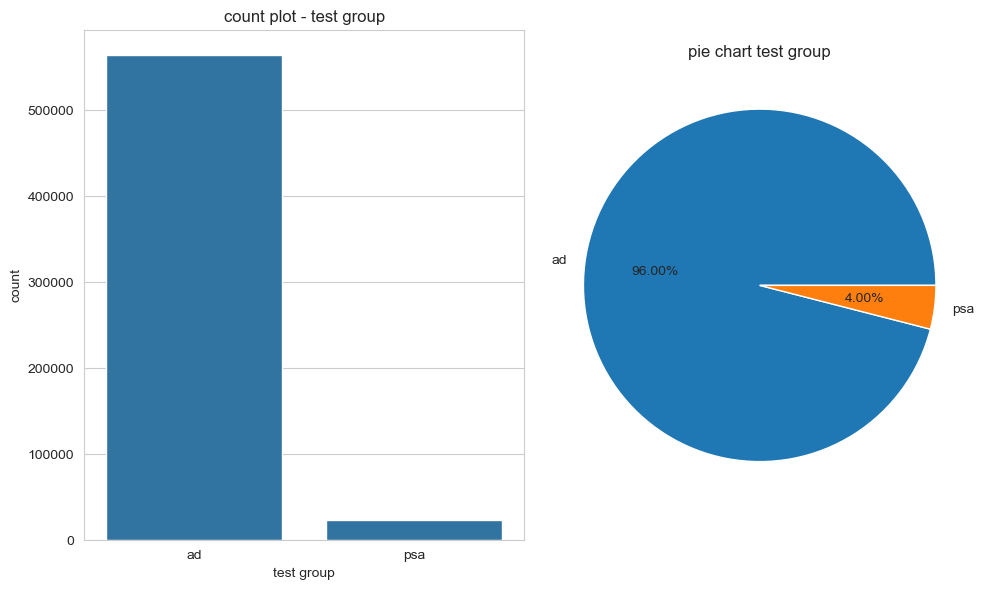

In [69]:
variable = "test group"

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f"count plot - {variable}")

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct="%0.2f%%")
plt.title(f"pie chart {variable}")

plt.tight_layout()
plt.show()

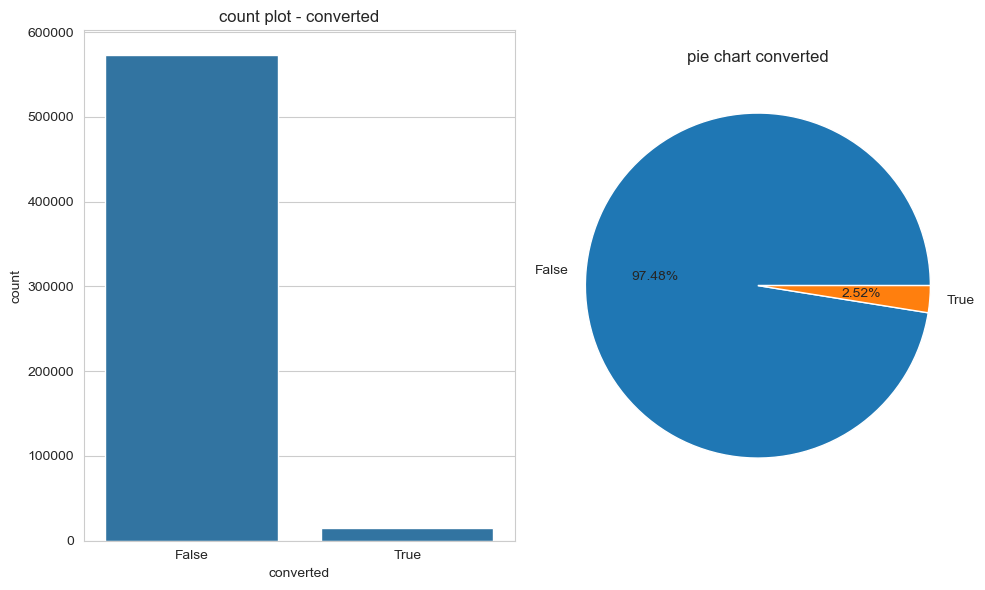

In [70]:
variable = "converted"

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f"count plot - {variable}")

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct="%0.2f%%")
plt.title(f"pie chart {variable}")

plt.tight_layout()
plt.show()

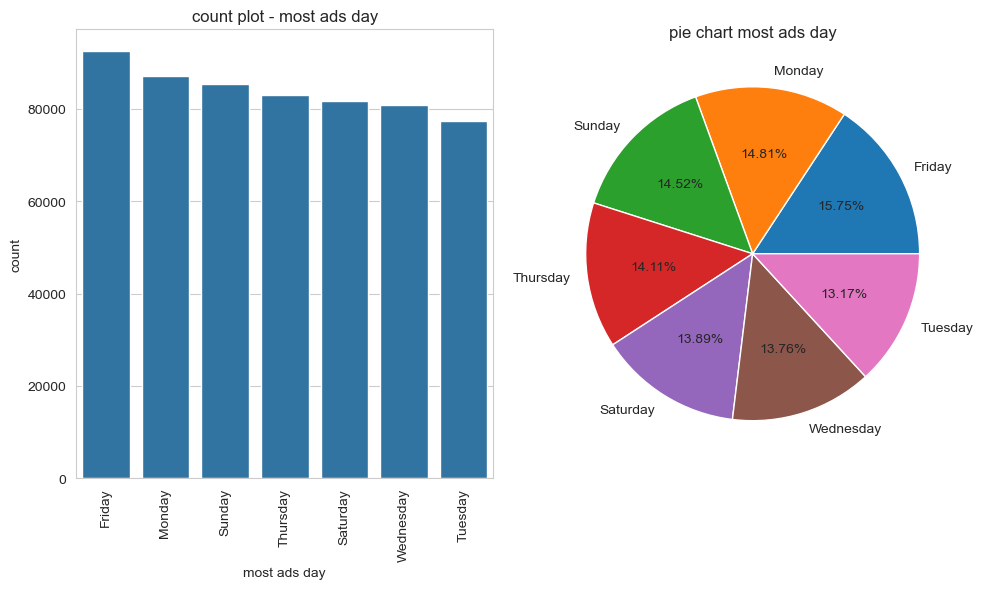

In [71]:
variable = "most ads day"

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat["most ads day"].value_counts().index)
plt.title(f"count plot - {variable}")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct="%0.2f%%")
plt.title(f"pie chart {variable}")

plt.tight_layout()
plt.show()

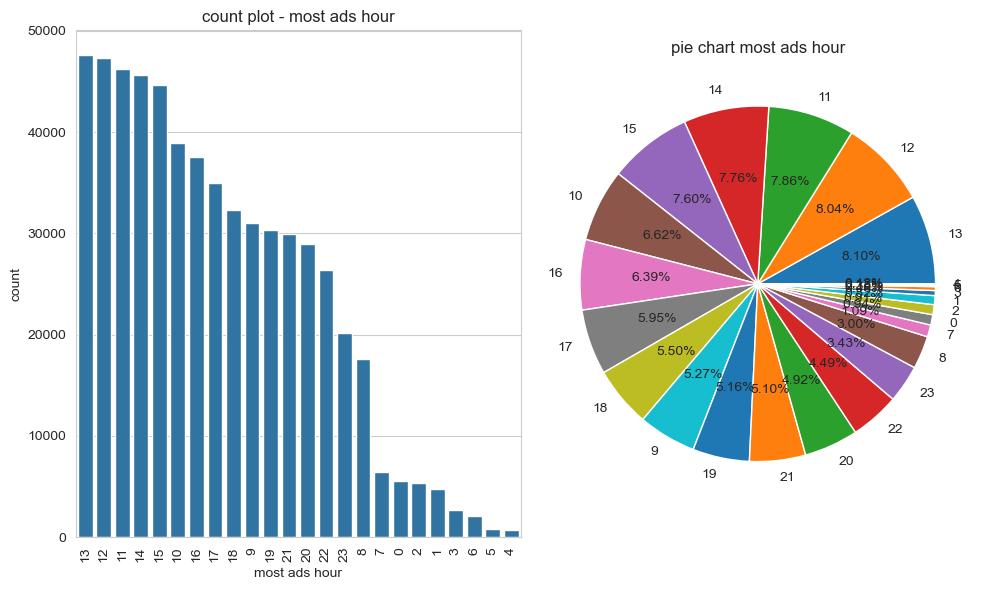

In [72]:
variable = "most ads hour"

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat["most ads hour"].value_counts().index)
plt.title(f"count plot - {variable}")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts= df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct="%0.2f%%")
plt.title(f"pie chart {variable}")

plt.tight_layout()
plt.show()

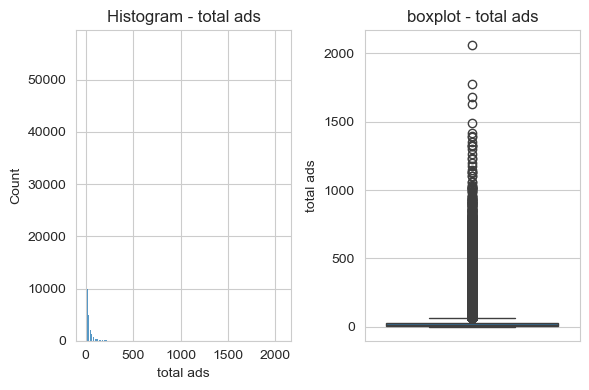

In [73]:
variable ="total ads"

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df)
plt.title(f"Histogram - {variable}")

plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f"boxplot - {variable}")

plt.tight_layout()
plt.show()

In [74]:
#  Checking the descriptive feature of the total ads column

df["total ads"].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

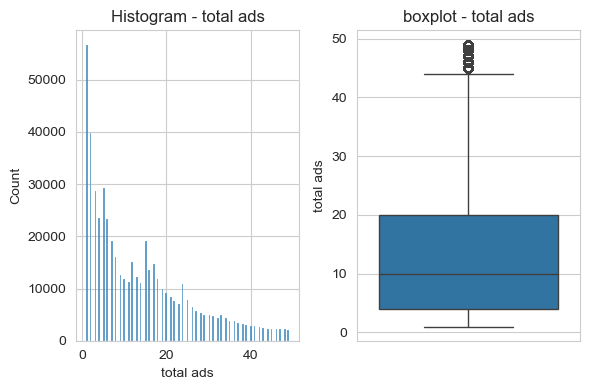

In [75]:
# Filtering the data to a value close to the 75th quantile  for better visualization

variable ="total ads"

plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df[df["total ads"]<50])
plt.title(f"Histogram - {variable}")

plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df["total ads"]<50])
plt.title(f"boxplot - {variable}")

plt.tight_layout()
plt.show()

Bivariate analysis.


In [76]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

<Axes: xlabel='test group'>

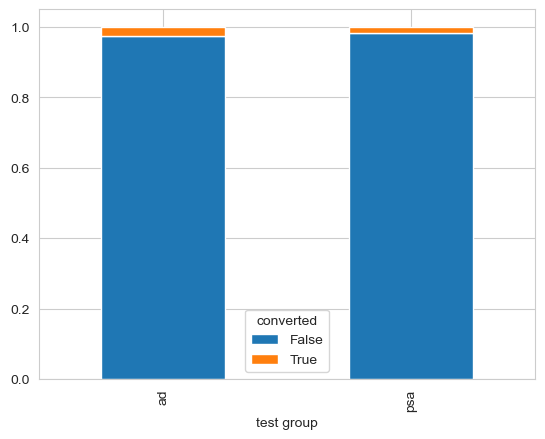

In [77]:
# conversion rate is the target column.

ct_conversion_test_group =pd.crosstab(df["test group"],df["converted"],normalize="index")
ct_conversion_test_group

ct_conversion_test_group.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

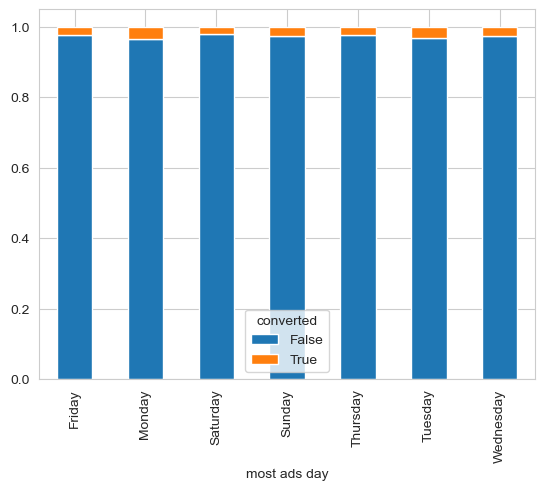

In [78]:

ct_conversion_day =pd.crosstab(df["most ads day"],df["converted"],normalize="index")
print(ct_conversion_day.sort_values(by=True, ascending= False))
ct_conversion_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

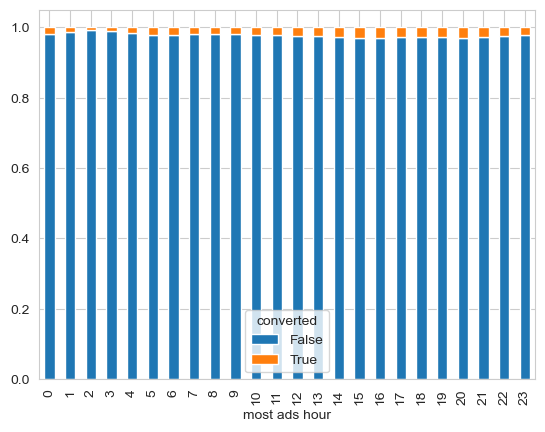

In [79]:

ct_conversion_day =pd.crosstab(df["most ads hour"],df["converted"],normalize="index")
print(ct_conversion_day.sort_values(by=True, ascending= False))
ct_conversion_day.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

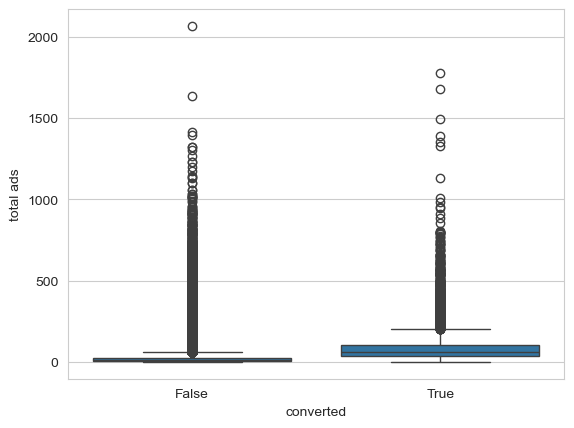

In [80]:
sns.boxplot(x="converted",y="total ads",data=df)

<Axes: xlabel='converted', ylabel='total ads'>

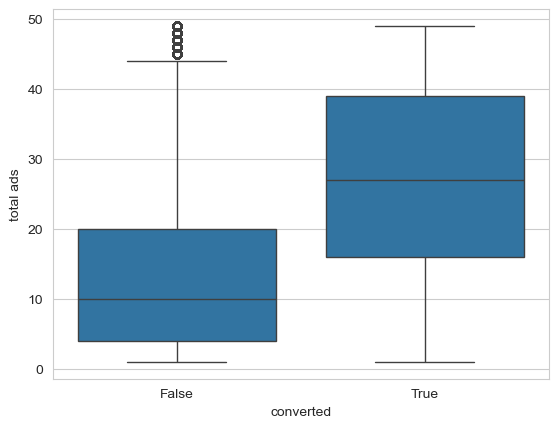

In [81]:
sns.boxplot(x="converted",y="total ads",data=df[df["total ads"]<50])

Statistical test

In [82]:
from scipy.stats import chi2_contingency

alpha=0.05

for variable in df_cat.columns:
    if variable != "converted":
        # Creating a contingency table(cross tabulation)
        contingency_table = pd.crosstab(df_cat[variable],df_cat["converted"])

        # Perform chi2 test
        chi2,p,_,_ =chi2_contingency(contingency_table)

        # print test results:
        print(f"\nChi squared test for {variable} Vs converted")
        print(f"Chi squared value {chi2}")
        print(f"P value{p}")

        # Check for significance:
        if p < alpha:
            print(f"Difference in conversion rate {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in the conversion rates across {variable}")

        


Chi squared test for test group Vs converted
Chi squared value 54.005823883685245
P value1.9989623063390075e-13
Difference in conversion rate test group is statistically significant.

Chi squared test for most ads day Vs converted
Chi squared value 410.0478857936585
P value1.932184379244731e-85
Difference in conversion rate most ads day is statistically significant.

Chi squared test for most ads hour Vs converted
Chi squared value 430.76869230822086
P value8.027629823696771e-77
Difference in conversion rate most ads hour is statistically significant.


In [83]:
from scipy.stats import shapiro,levene,ttest_ind,mannwhitneyu

# Check assumptions.(normal assumption)
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df["converted"]== True]["total ads"])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df["converted"]== False]["total ads"])

print(f"Shapiro-wilk test for normality (True group): P value = {shapiro_p_value_true}")
print(f"Shapiro-wilk test for normality (False group): P value = {shapiro_p_value_false}")

# Equality of variances assumption

levene_stat,levene_p_value =levene(df[df["converted"]]["total ads"],df[df["converted"]]["total ads"])
print(f"Levene test for equality of variances: P-value = {levene_p_value}")


Shapiro-wilk test for normality (True group): P value = 1.638680987007771e-98
Shapiro-wilk test for normality (False group): P value = 9.883049430735801e-204
Levene test for equality of variances: P-value = 1.0


In [84]:
#  Performing a suitable test.

alpha =0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    # Assumption met - use t-test for means
    t_stat,t_p_value = ttest_ind(df[df["converted"]]["total ads"], df[df["converted"]]["total ads"])
    print(f"Independent two sample t-test: p-value = {t_p_value}")
else:
    # Assumption not met
    u_stat,u_p_value =mannwhitneyu(df[df["converted"]]["total ads"],df[df["converted"]]["total ads"])
    print(f"Mann whitney U test: P value = {u_p_value}")

Mann whitney U test: P value = 1.0


END
